<a href="https://colab.research.google.com/github/Ilvecho/Project_5/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and load data

In [17]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import os


files.upload()
pass

Saving 2020Q1Q2Q3Q4-2021Q1 - South Korea - Dongkuk Steel Mill Co Ltd (001230).csv to 2020Q1Q2Q3Q4-2021Q1 - South Korea - Dongkuk Steel Mill Co Ltd (001230).csv
Saving 2020Q1Q2Q3Q4-2021Q1 - South Africa - Impala Platinum Holdings Ltd (IMPJ).csv to 2020Q1Q2Q3Q4-2021Q1 - South Africa - Impala Platinum Holdings Ltd (IMPJ).csv
Saving 2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv to 2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv
Saving 2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv to 2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv
Saving 2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv to 2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv
Saving 2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP).csv to 2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP) (1).csv
Saving 2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv to 2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv
Saving 2020Q

In [55]:
tmp_data = pd.read_csv('2020Q1Q2Q3Q4-2021Q1 - Colombia - Cementos Argos SA (CCB).csv')[:-1]
tmp_data['Date'] = pd.to_datetime(tmp_data['Date'])
tmp_data.set_index('Date', inplace=True)
price = tmp_data.Price.apply(lambda x: x.replace(',', ''))
price.astype(float)

Date
2021-03-31    5150.0
2021-03-30    5100.0
2021-03-29    5045.0
2021-03-26    5020.0
2021-03-25    5030.0
               ...  
2020-01-09    6810.0
2020-01-08    6880.0
2020-01-07    6950.0
2020-01-03    7000.0
2020-01-02    7120.0
Name: Price, Length: 303, dtype: float64

In [71]:
file_list = os.listdir('/content/')
data = {}

for filename in file_list:
    if filename.startswith('2020Q1'):
      country = filename.split(' - ')[1].strip()
      tmp_data = pd.read_csv(filename)[:-1]
      tmp_data['Date'] = pd.to_datetime(tmp_data['Date'])
      tmp_data.set_index('Date', inplace=True)

      # A couple of exceptions in the dataset in which commas are used to separate the thousands
      if country == 'Colombia' or country == 'South Africa':
        tmp_data['Price'] = tmp_data['Price'].apply(lambda x: x.replace(',', ''))

      data[country] = tmp_data['Price'].astype(float).sort_index()
    else:
      file_list.remove(filename)

In [ ]:
for key in data.keys():
  print('\n\n###########\n')
  print(data[key].info())

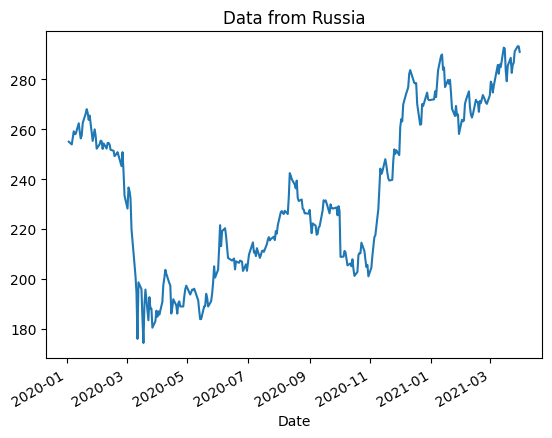

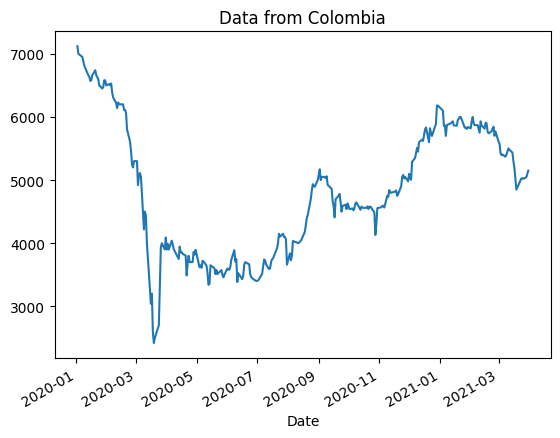

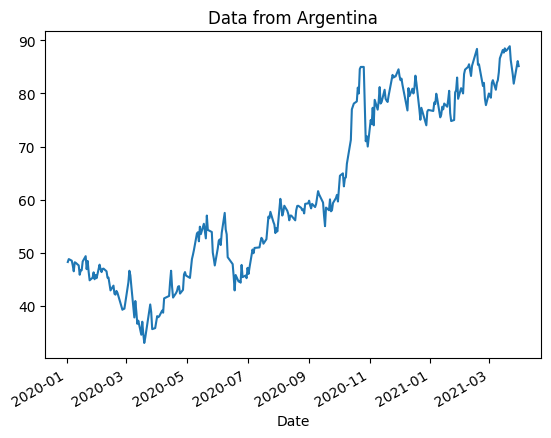

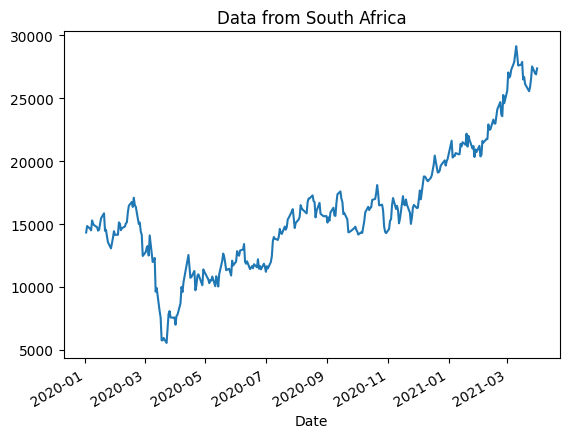

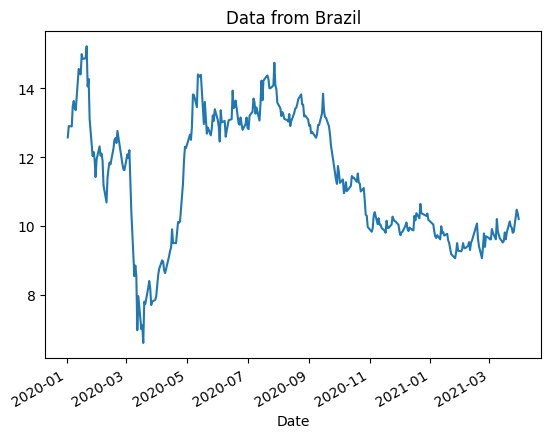

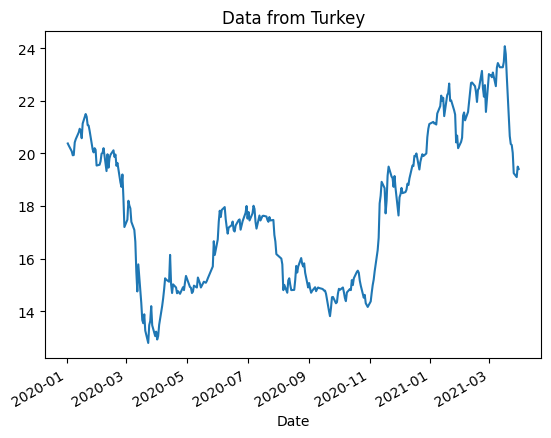

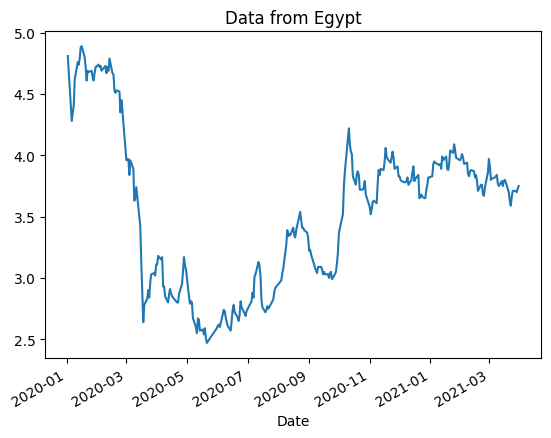

In [65]:
for key in data.keys():
  fig = plt.Figure()
  ax = data[key].plot()
  ax.set_title(f'Data from {key}')
  plt.show()

# Pre processing

**Normalize**

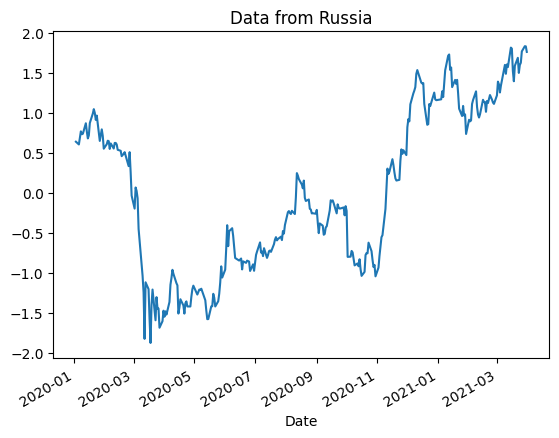

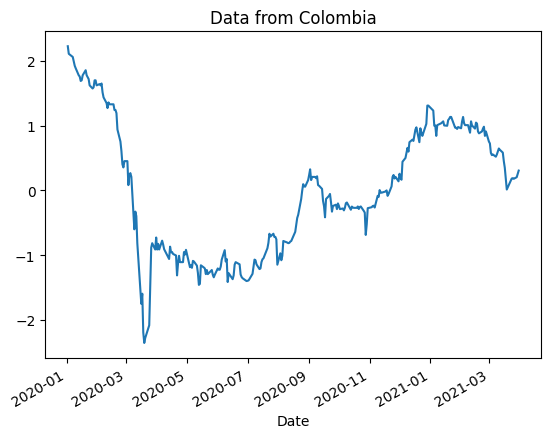

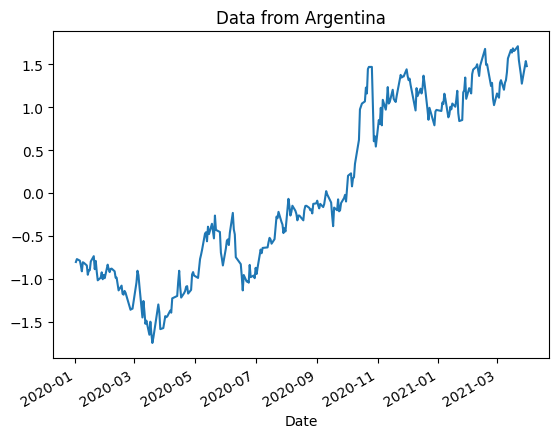

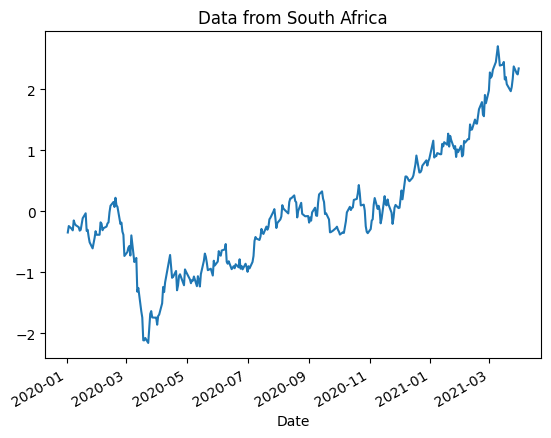

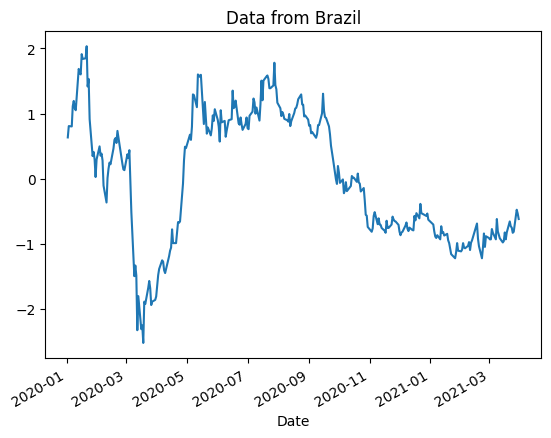

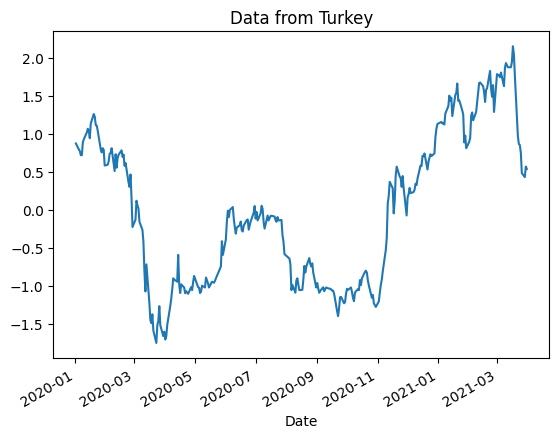

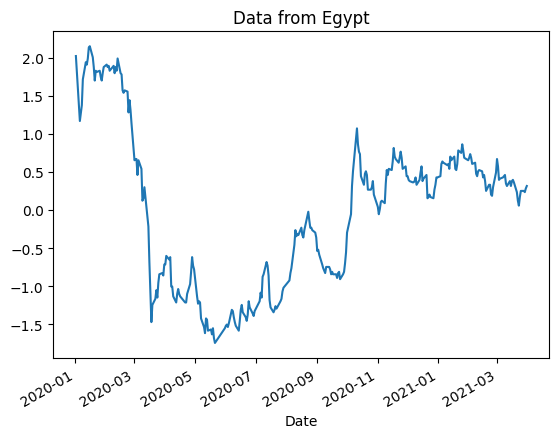

In [72]:
norm_data = {}

for key in data.keys():
  price = data[key]
  avg, dev = price.mean(), price.std()
  norm_price = (price - avg) / dev
  norm_data[key] = norm_price

  fig = plt.Figure()
  ax = norm_price.plot()
  ax.set_title(f'Data from {key}')
  plt.show()

There is clearly a growing trend in the data.

Let's remove it using **first difference**

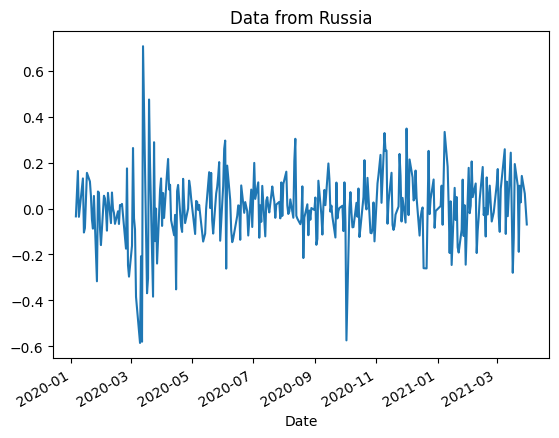

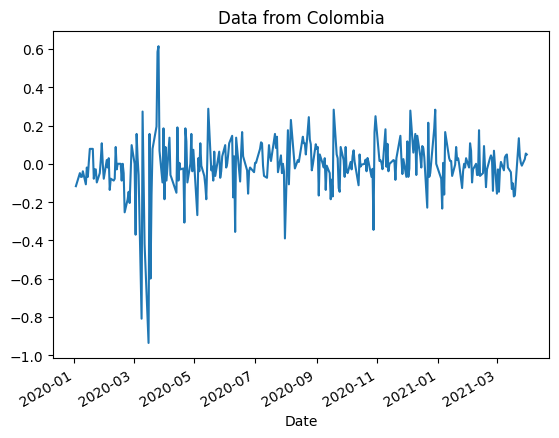

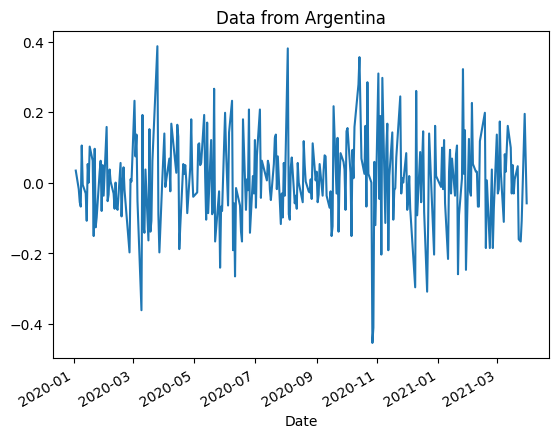

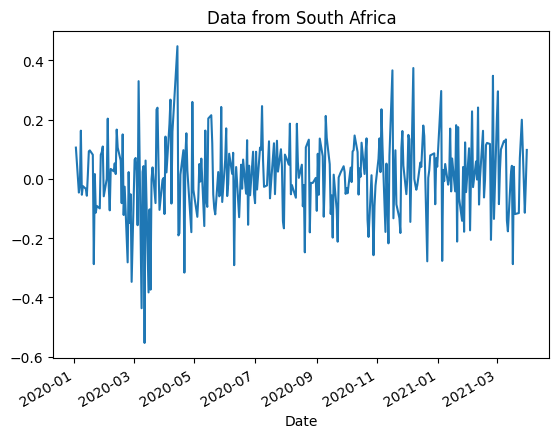

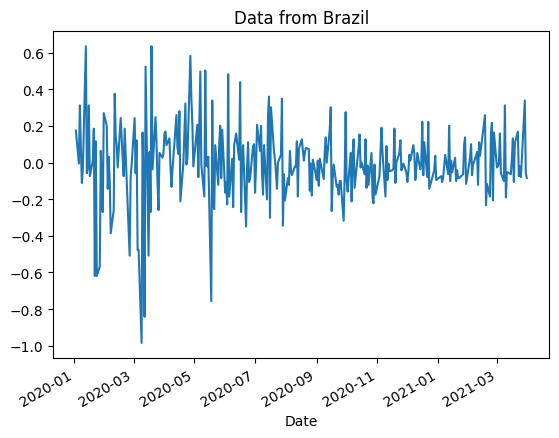

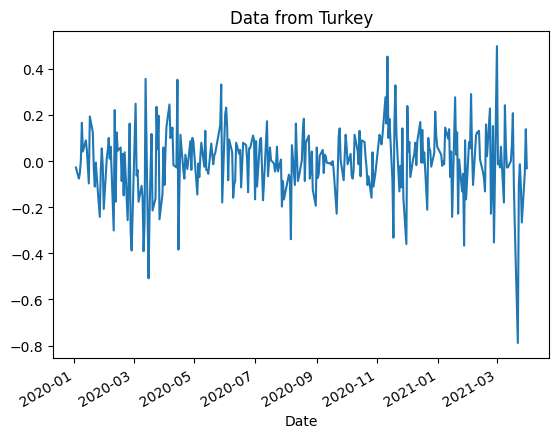

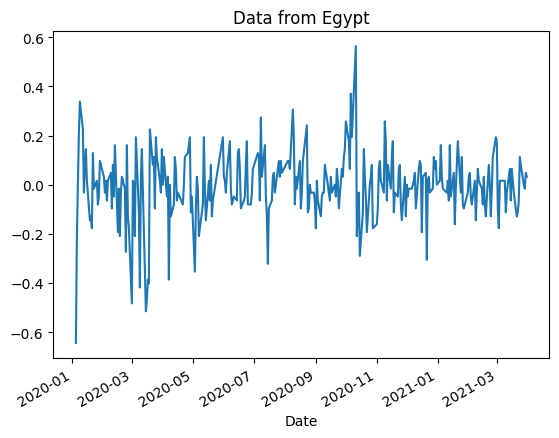

In [74]:
diff_data = {}

for key in norm_data.keys():
  diff_price = norm_data[key].diff().dropna()
  diff_data[key] = diff_price

  fig = plt.Figure()
  ax = diff_price.plot()
  ax.set_title(f'Data from {key}')
  plt.show()

Now the time series look much more **stationary**.

Furthermore, we notice that the **volatility** is more or less constant in the timeframe.

Lastly, there is no clear sign of seasonality in the data